In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb


# Cargar los conjuntos de datos
train_df = pd.read_csv("C:/Users/ivan_/Documents/bootcamp/machine_learning/examen01/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("C:/Users/ivan_/Documents/bootcamp/machine_learning/examen01/house-prices-advanced-regression-techniques/test.csv")


In [17]:
# 1. Limpieza de datos

# Identificar y eliminar valores duplicados
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# Verificar y ajustar tipos de datos
# train_df['OverallQual'] = train_df['OverallQual'].astype('category')  # No es necesario

# Manejar valores faltantes adecuadamente en ambos conjuntos de datos
for df in [train_df, test_df]:
    for column in df.columns:
        # Imputar valores faltantes con la moda para columnas categóricas
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        # Imputar valores faltantes con la mediana para columnas numéricas
        elif df[column].dtype in ['int64', 'float64']:
            df[column] = df[column].fillna(df[column].median())


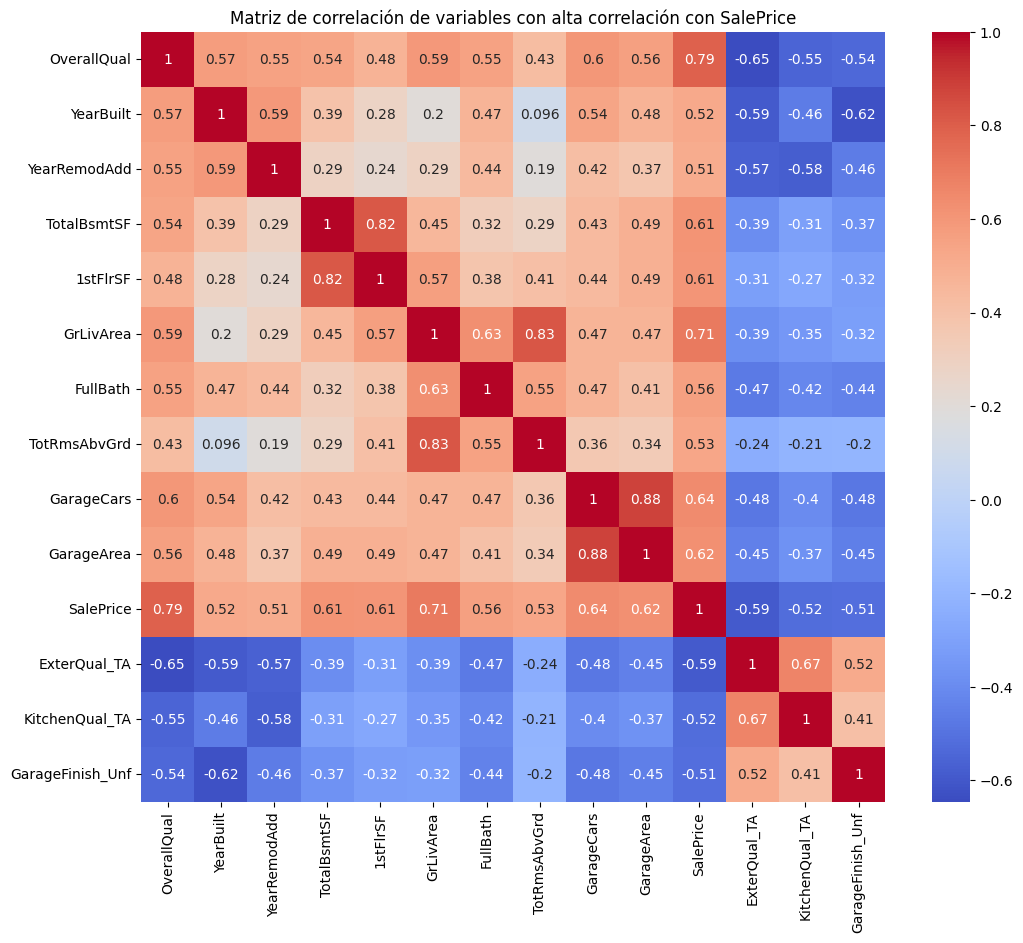

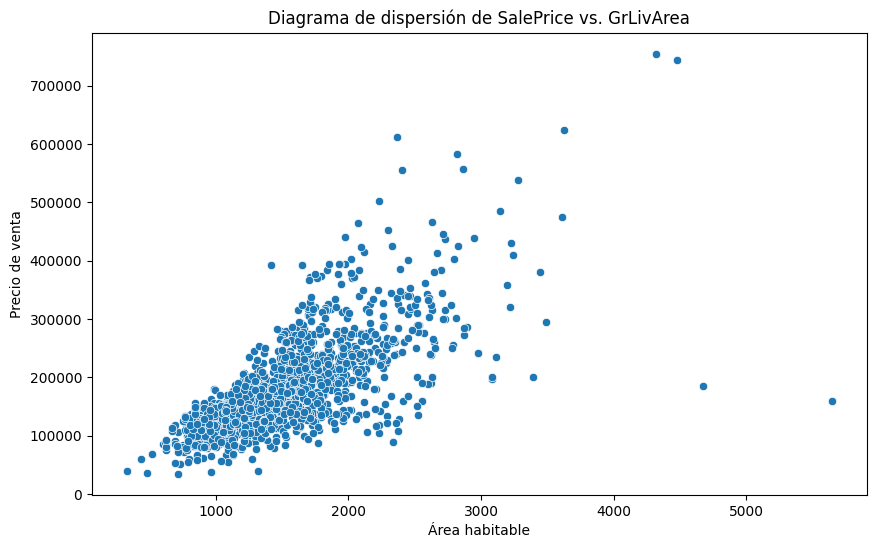

No se encontraron columnas 'OverallQual_' después de one-hot encoding.

Estadísticas descriptivas:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.1171

<Figure size 1000x600 with 0 Axes>

In [18]:
# 2. Exploración de datos

# Convertir columnas categóricas a numéricas usando one-hot encoding
train_df = pd.get_dummies(train_df, drop_first=True)

# Calcular la matriz de correlación
corr_matrix = train_df.corr()

# Filtrar las variables con una correlación absoluta con 'SalePrice' mayor a 0.5
top_corr_features = corr_matrix[abs(corr_matrix['SalePrice']) > 0.5]['SalePrice'].index

# Visualizar la matriz de correlación de las variables más correlacionadas
plt.figure(figsize=(12, 10))
sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de variables con alta correlación con SalePrice')
plt.show()

# Visualizaciones univariadas y multivariadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Diagrama de dispersión de SalePrice vs. GrLivArea')
plt.xlabel('Área habitable')
plt.ylabel('Precio de venta')
plt.show()

#  Ajustar el código para el boxplot
plt.figure(figsize=(10, 6))

# Obtener las columnas que se crearon a partir de 'OverallQual'
overallqual_cols = [col for col in train_df.columns if col.startswith('OverallQual_')]

# Verificar si hay columnas 'OverallQual_' antes de acceder a la lista
if overallqual_cols:
    #  Usar la primera columna como ejemplo en el boxplot
    sns.boxplot(x=overallqual_cols[0], y='SalePrice', data=train_df)
    plt.title('Diagrama de caja de SalePrice vs. OverallQual')
    plt.xlabel('Calidad general')
    plt.ylabel('Precio de venta')
    plt.show()
else:
    print("No se encontraron columnas 'OverallQual_' después de one-hot encoding.")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(train_df.describe())  # Eliminado to_markdown()

print("\nModa:")
print(train_df.mode().iloc[0])


In [ ]:
# 3. Implementación de modelos

# Preparar los datos para el aprendizaje automático
X = train_df[top_corr_features.drop('SalePrice')]
y = train_df['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de regresión lineal   

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Inicializar y entrenar un modelo LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluar los modelos usando las métricas MSE, RMSE y R^2
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb) 
r2_lgb = r2_score(y_test, y_pred_lgb)

# Comparar los resultados de los modelos
print("\nEvaluación del modelo:")
print("Regresión lineal:")
print(f"  MSE: {mse_linear:.2f}")
print(f"  RMSE: {rmse_linear:.2f}")
print(f"  R^2: {r2_linear:.2f}")

print("\nLightGBM:")
print(f"  MSE: {mse_lgb:.2f}")
print(f"  RMSE: {rmse_lgb:.2f}")
print(f"  R^2: {r2_lgb:.2f}")

# Interpretación de resultados
print("\nInterpretación de resultados:")
if r2_lgb > r2_linear:
    print("El modelo LightGBM tiene un mejor rendimiento que la regresión lineal.")
    print("LightGBM es capaz de capturar relaciones no lineales en los datos, lo que lo hace más adecuado para este dataset.")
else:
    print("La regresión lineal tiene un mejor rendimiento que el modelo LightGBM.")
    print("La regresión lineal es un modelo más simple y puede ser más fácil de interpretar.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 13
[LightGBM] [Info] Start training from score 181441.541952

Evaluación del modelo:
Regresión lineal:
  MSE: 1566109296.55
  RMSE: 1566109296.55
  R^2: 0.80

LightGBM:
  MSE: 1041890244.44
  RMSE: 1041890244.44
  R^2: 0.86

Interpretación de resultados:
El modelo LightGBM tiene un mejor rendimiento que la regresión lineal.
LightGBM es capaz de capturar relaciones no lineales en los datos, lo que lo hace más adecuado para este dataset.
